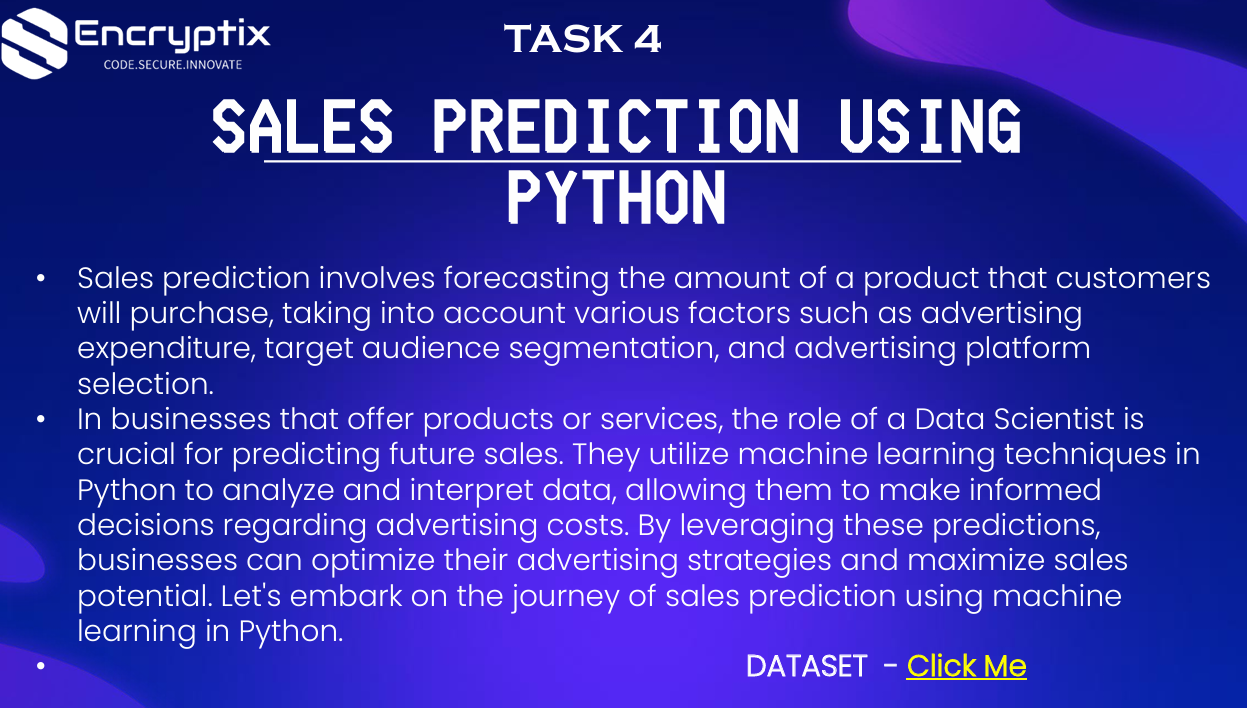

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('advertising.csv')
df.sample(5)

,TV,Radio,Newspaper,Sales
11,214.7,24.0,4.0,17.4
85,193.2,18.4,65.7,20.2
61,261.3,42.7,54.7,24.2
162,188.4,18.1,25.6,19.9
173,168.4,7.1,12.8,16.7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<h3>EDA<h3>

In [14]:
print(df['TV'].skew())
print(df['Radio'].skew())
print(df['Newspaper'].skew())
print(df['Sales'].skew())

-0.06985336213274573
0.09417463149664404
0.8947204074986175
-0.07373923537186912


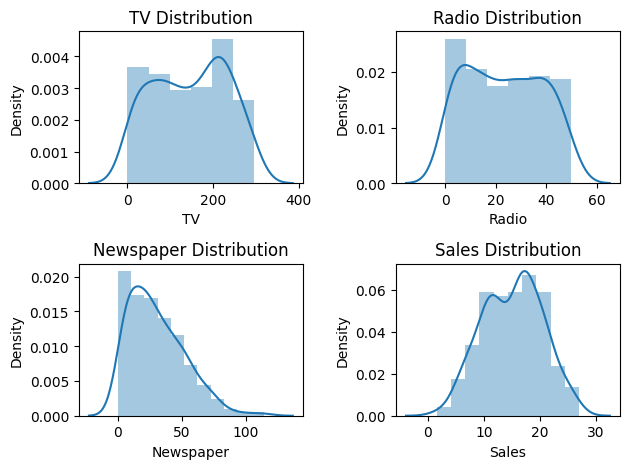

In [29]:

plt.subplot(2,2,1)
sns.distplot(df['TV']).set_title('TV Distribution')
plt.subplot(2,2,2)
sns.distplot(df['Radio']).set_title('Radio Distribution')
plt.subplot(2,2,3)
sns.distplot(df['Newspaper']).set_title('Newspaper Distribution')
plt.subplot(2,2,4)
sns.distplot(df['Sales']).set_title('Sales Distribution')
plt.tight_layout()
plt.show()

<h4>So as we can see Newspaper and Sales data are skewed so we may need to remove ouliers using some IQR<h4>

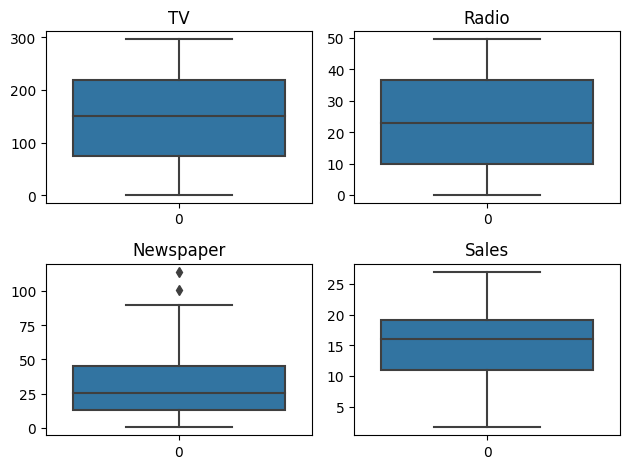

In [30]:
# Plotting box plots for all numerical columns to visualize outliers
plt.subplot(2,2,1)
sns.boxplot(df['TV']).set_title('TV')
plt.subplot(2,2,2)
sns.boxplot(df['Radio']).set_title('Radio')
plt.subplot(2,2,3)
sns.boxplot(df['Newspaper']).set_title('Newspaper')
plt.subplot(2,2,4)
sns.boxplot(df['Sales']).set_title('Sales')
plt.tight_layout()
plt.show()


<h3> As we can visualize there is insignificant outliers in the data so we can proceed to model training on it<h3>

<h3>Univariate Analysis<h3>

Feature Variables are:
    1. TV
    2.Radio
    3.Newspaper
Target Variable : Sales ( To Predict)

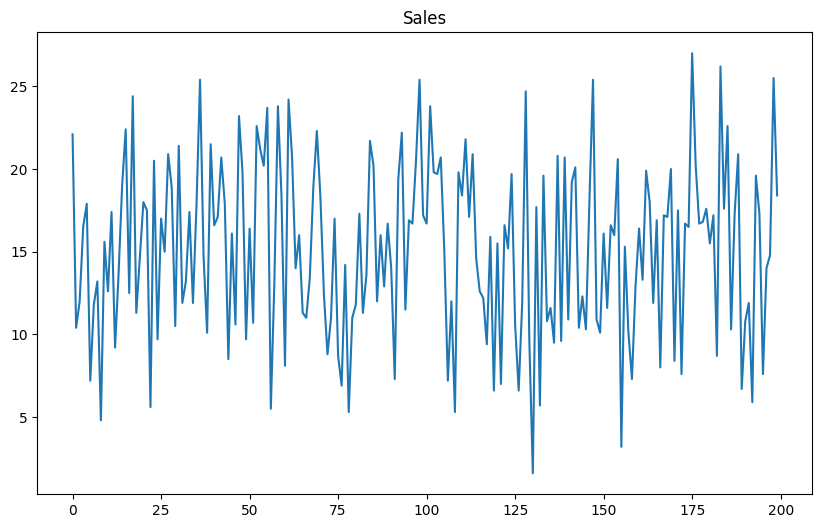

In [38]:
plt.figure(figsize=(10,6))
plt.plot(df['Sales'])
plt.title('Sales')
plt.show()

<h3>Multivariate Analysis<h3>

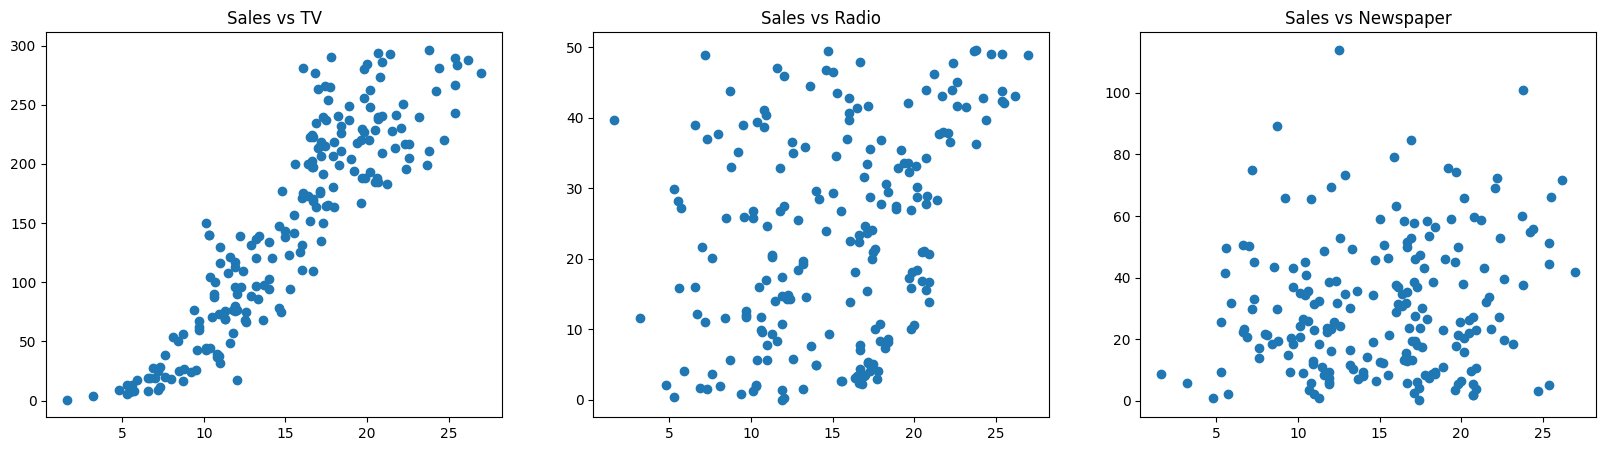

In [47]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Sales vs TV')
plt.scatter(df['Sales'], df['TV'])

plt.subplot(1,3,2)
plt.title('Sales vs Radio')
plt.scatter(df['Sales'], df['Radio'])

plt.subplot(1,3,3)
plt.title('Sales vs Newspaper')
plt.scatter(df['Sales'], df['Newspaper'])

plt.show()

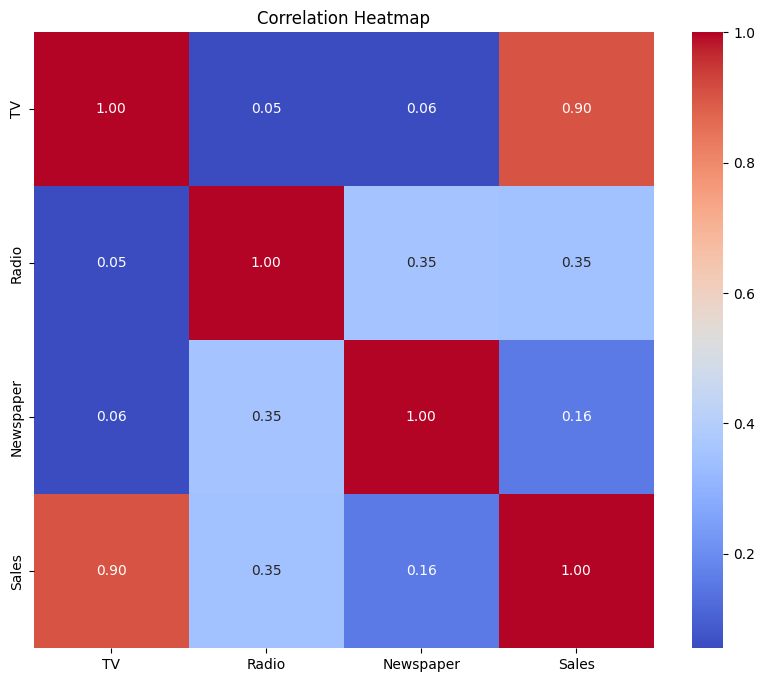

In [49]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Is is clearly visible from the scatter plot and the heatmap, TV feature shows strong correlation with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

Performing Simple Linear Regression¶
    Equation of linear regression
    y=c+m1x1+m2x2+...+mnxn
    y is the response
    c is the intercept
    m1 is the coefficient for the first feature
    mn is the coefficient for the nth feature
In this case:
y=c+m1×TV
The m values are called the model coefficients or model parameters.

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Training MSE: 4.998442356450173
Testing MSE: 6.101072906773963
Training R^2: 0.8134866044709264
Testing R^2: 0.802561303423698


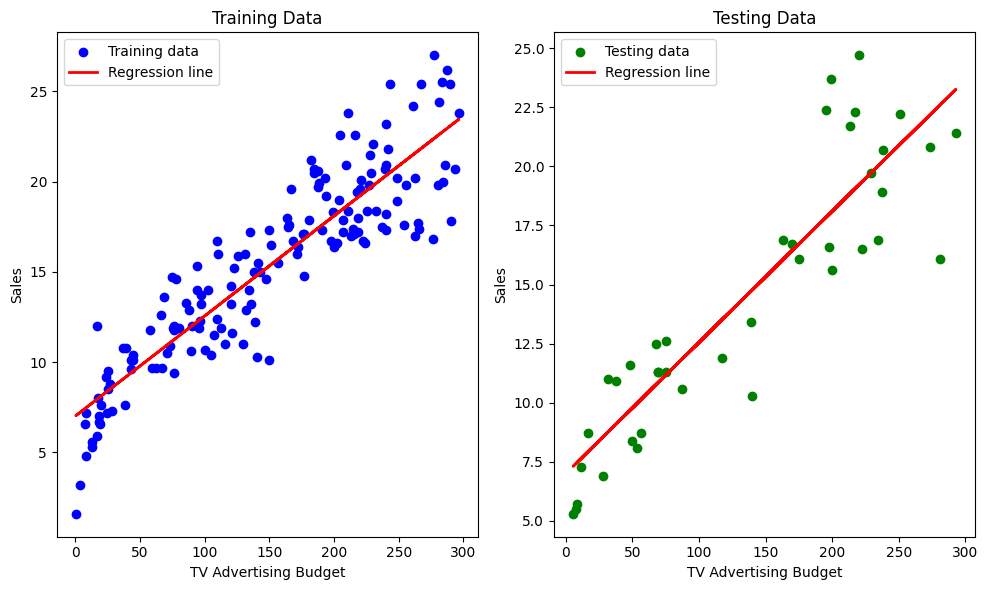

Training MSE: 4.998442356450173
Testing MSE: 6.101072906773963
Training R^2: 0.8134866044709264
Testing R^2: 0.802561303423698


In [59]:
# Define the feature and target variable
X = df[['TV']]  # Note: X should be a DataFrame
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)
print("Training R^2:", r2_train)
print("Testing R^2:", r2_test)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Regression line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Training Data')
plt.legend()

# Plot testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='Regression line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Testing Data')
plt.legend()

plt.tight_layout()
plt.show()


# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)
print("Training R^2:", r2_train)
print("Testing R^2:", r2_test)




<h2>Conclusion<h2>

THe R^2 score for our model is coming out to be 0.8 which is close 1 signifies a pretty food model prediction, although we can improve it's accuracy using some slight changes in the regression model.